In [63]:
##############################################################################
#                           NN - BASICS
##############################################################################

########## TABLE OF CONTENTS #############
# 1. DATA READ IN
# 2. DATA PREPARATION
# 3. HYPERPARAMS GRIDSEARCH
# 4. TRAIN BEST HYPERPARAMS MODEL AND EVALUATE MODEL PERFORMANCE

#########################################################################

from Modules import *

1. DATA READ IN

In [57]:
df = pd.read_csv("Heart.txt", index_col=0)
df

df['TrainTestFlag'] = 0
df.iloc[pd.Series(df.index).sample(frac=0.5, random_state=1234), df.columns.get_loc('TrainTestFlag')] = 1
print("Train vs Test sample")
print(df['TrainTestFlag'].value_counts())
print("")
print(df['chd'].value_counts())
print("")
df.shape
df.info()


# sbp		systolic blood pressure
# tobacco	cumulative tobacco (kg)
# ldl		low densiity lipoprotein cholesterol
# adiposity
# famhist	family history of heart disease (Present, Absent)
# typea		type-A behavior
# obesity
# alcohol	current alcohol consumption
# age		age at onset
# chd		response, coronary heart disease  -> TARGET VARIABLE

Train vs Test sample
TrainTestFlag
0    231
1    231
Name: count, dtype: int64

chd
0    302
1    160
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 1 to 463
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sbp            462 non-null    int64  
 1   tobacco        462 non-null    float64
 2   ldl            462 non-null    float64
 3   adiposity      462 non-null    float64
 4   famhist        462 non-null    object 
 5   typea          462 non-null    int64  
 6   obesity        462 non-null    float64
 7   alcohol        462 non-null    float64
 8   age            462 non-null    int64  
 9   chd            462 non-null    int64  
 10  TrainTestFlag  462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.3+ KB


2. DATA PREPARATION

In [58]:
df['familiarity'] = np.where(df['famhist'] == "Absent",0,np.where(df['famhist'] == "Present",1,-1))
df = df.drop(columns=['famhist'],axis=1)

#Split Train vs Test -> 50% vs 50%
train = df.loc[df['TrainTestFlag'] == 1]
test = df.loc[df['TrainTestFlag'] == 0]

colsToKeep = ['sbp',
              'tobacco', 
              'ldl', 
              'adiposity',
              'typea',
              'obesity', 
              'alcohol',
              'age', 
              'familiarity'
              ]

X_train = train[colsToKeep]
X_test = test[colsToKeep]


y_train = train['chd'].values
y_test = test['chd'].values


3. HYPERPARAMS GRIDSEARCH

In [59]:
params={'batch_size':[15,20],  #, 100, 300, 400
        'nb_epoch':[50], #, 200, 300, 400
        'unit':[5,6],#, 10, 11, 12, 15 
           
        } 

model=KerasClassifier(build_fn=build_clf)

gs=GridSearchCV(estimator=model, param_grid=params, cv=10) 
# now fit the dataset to the GridSearchCV object.  
gs = gs.fit(X_train, y_train)



12/12 [==============================] - 0s 1ms/step - loss: 26.3073 - accuracy: 0.6667


4. TRAIN BEST HYPERPARAMS MODEL AND EVALUATE MODEL PERFORMANCE

8/8 [==============================] - 0s 2ms/step
Model accuracy score on Train Sample : 0.3333
8/8 [==============================] - 0s 2ms/step
Model accuracy score on Test Sample: 0.3636
Confusion matrix

 [[  1 147]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       148
           1       0.36      1.00      0.53        83

    accuracy                           0.36       231
   macro avg       0.68      0.50      0.27       231
weighted avg       0.77      0.36      0.20       231

8/8 [==============================] - 0s 2ms/step
Gini for Train Sample is 37.325



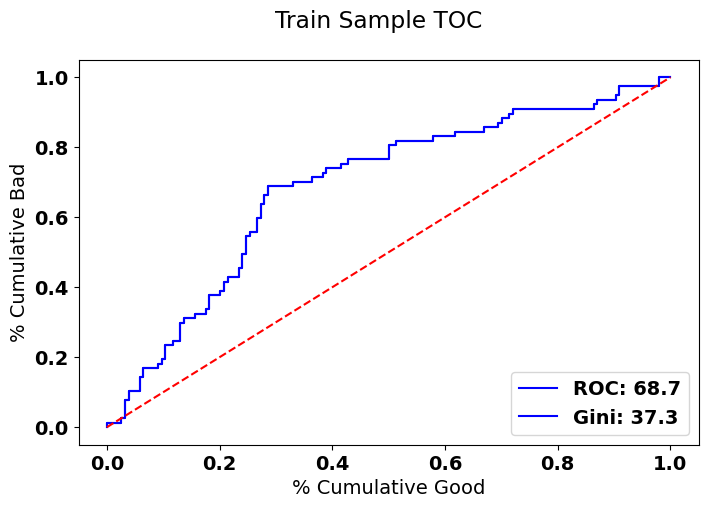

8/8 [==============================] - 0s 1ms/step
Gini for Test Sample is 31.325



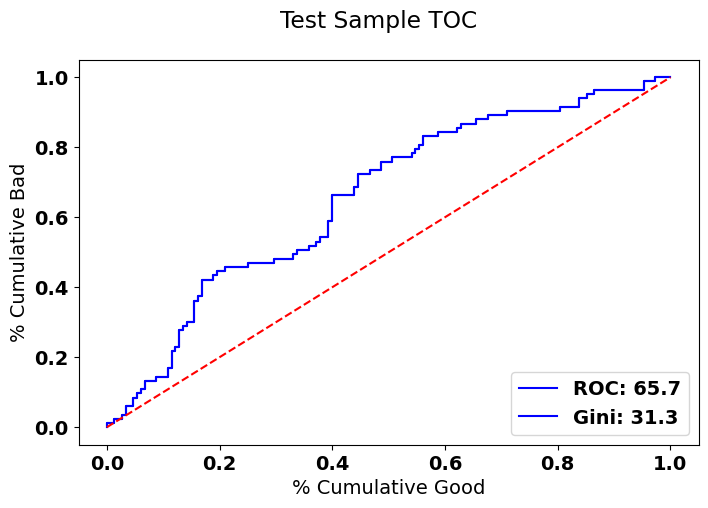

In [72]:
#{'batch_size': 20, 'nb_epoch': 50, 'unit': 5}

clf = KerasClassifier(build_clf, nb_epoch=50, unit = 5, batch_size = 20)
clf.fit(X_train, y_train)



# Accuracy Score on Train Sample
y_pred = clf.predict(X_train)
print('Model accuracy score on Train Sample : {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

#Accuracy Score on Train Sample
y_pred = clf.predict(X_test)
print('Model accuracy score on Test Sample: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Confusion Matrix (on Test Sample)
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred))
    
# Gini calculation on Train Sample
y_pred_proba = clf.predict_proba(X_train)[:,1]
[fpr, tpr, thr] = roc_curve(y_train, y_pred_proba)
rocauc=auc(fpr,tpr)*100
Gini = (auc(fpr, tpr)-0.5)*200
print("Gini for Train Sample is %2.3f" % Gini)
print("")

fig = plt.figure()    
fig.suptitle('Train Sample TOC')
ax1 = fig.add_subplot(1,1,1)
plt.plot(fpr,tpr,'b',label='ROC: %0.1f'% rocauc)
plt.plot(fpr,tpr,'b',label='Gini: %0.1f'% Gini)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('% Cumulative Good')
plt.ylabel('% Cumulative Bad')
plt.show()


    
# Gini calculation on Test Sample
y_pred_proba = clf.predict_proba(X_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
rocauc=auc(fpr,tpr)*100
Gini = (auc(fpr, tpr)-0.5)*200
print("Gini for Test Sample is %2.3f" % Gini)
print("")

fig = plt.figure()    
fig.suptitle('Test Sample TOC')
ax1 = fig.add_subplot(1,1,1)
plt.plot(fpr,tpr,'b',label='ROC: %0.1f'% rocauc)
plt.plot(fpr,tpr,'b',label='Gini: %0.1f'% Gini)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('% Cumulative Good')
plt.ylabel('% Cumulative Bad')
plt.show()
